In [1]:
import pandas as pd 
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/ayesh/Documents/SEM3/IP/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

##### The output shows that we have around 319795 entries with 18  columns. No null values, and we have 14 numeric features, and 4 categorial features. We can convert the string attributes that has only two possibilities of unique values, but first let's make sure that there is no abnormal values.

In [5]:
df.nunique()


HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

#### We have some attributes that have more than two unique values, we'll use <span style ='color:#0386f7de'>OneHotEncoder </span>in the preprocessing step later.

In [6]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

/var/folders/67/f7tt4bl53c758trm8cl283tc0000gn/T/ipykernel_3339/4039156416.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })


In [7]:


fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend();

- Remember that number one refers to men and 0 refers to women on the x-axis.
- Most cases of heart disease are <span style ='color:#0386f7de'>men </span>.
- Most cases that got no hart disease are <span style ='color:#0386f7de'>women </span>.

In [8]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")

ax.legend();

In [9]:
print("dtype:", df['HeartDisease'].dtype)
print("unique:", df['HeartDisease'].unique())


dtype: int64
unique: [0 1]


In [10]:
df['HeartDisease_label'] = df['HeartDisease'].map({0: 'No', 1: 'Yes'}).astype('category')
df['HeartDisease_label'] = df['HeartDisease_label'].fillna(df['HeartDisease'].astype(str))

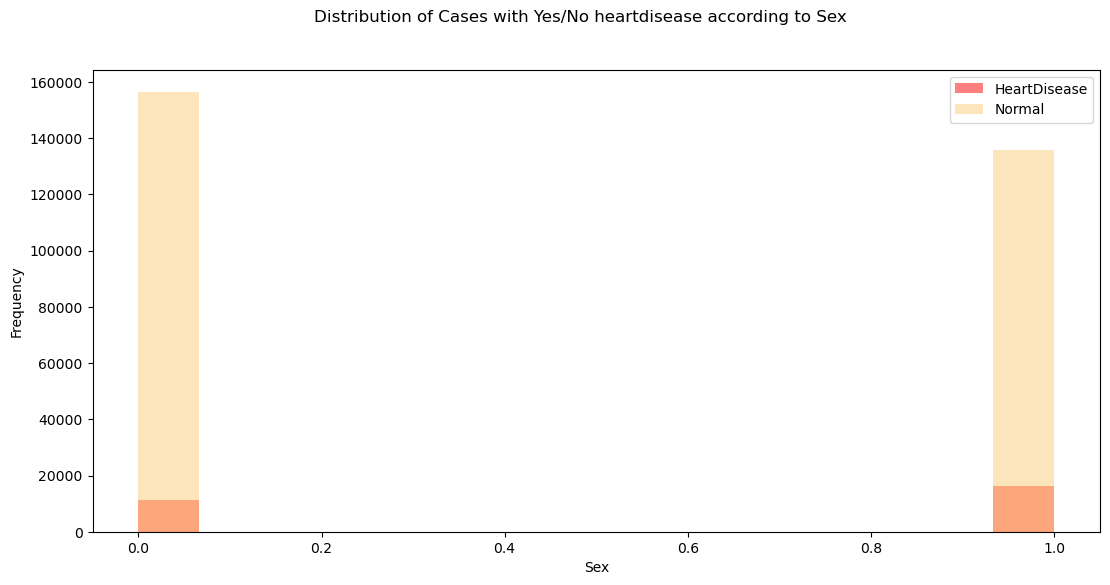

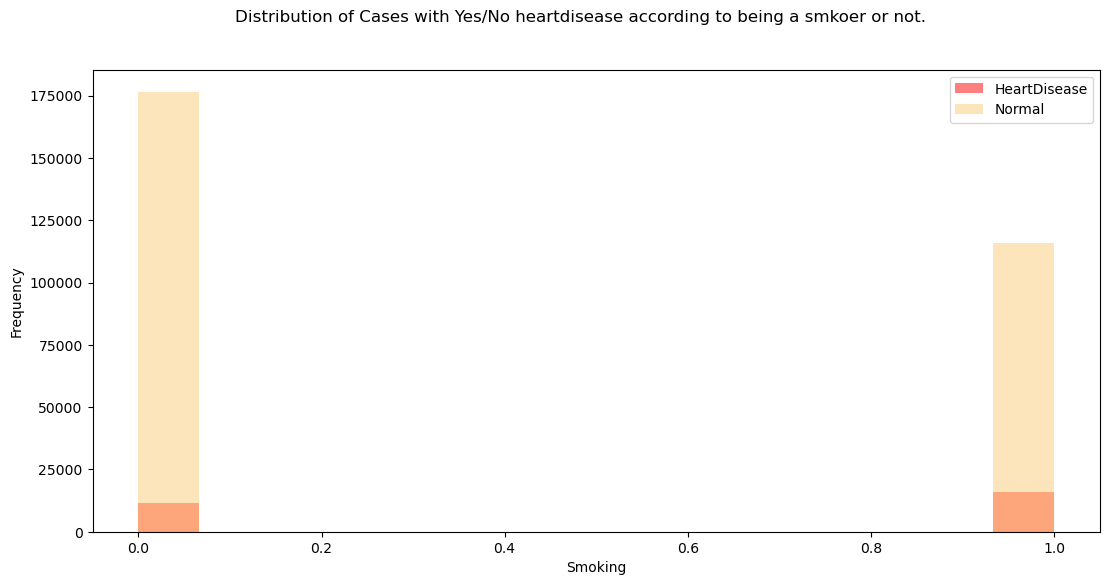

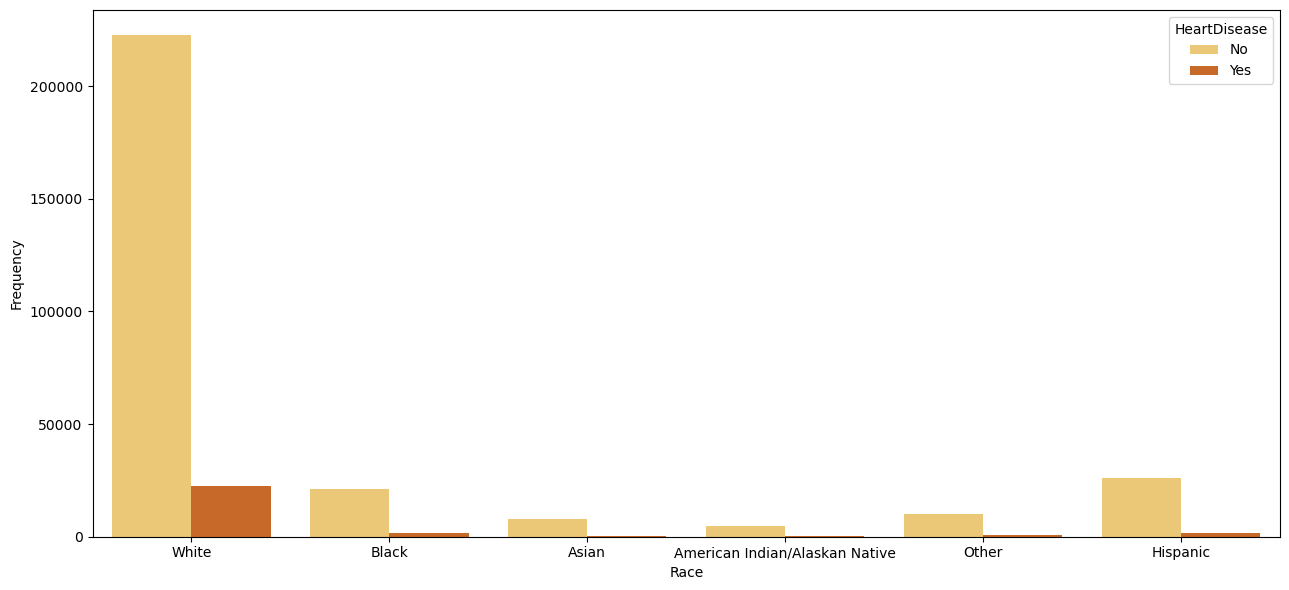

In [11]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x='Race', hue='HeartDisease_label', data=df, palette='YlOrBr')
ax.set_xlabel('Race')
ax.set_ylabel('Frequency')
ax.legend(title='HeartDisease')
plt.tight_layout()
plt.show()

- For smokers, they are the largest group that suffers from heart disease.
- There are also cases of heart disease, although they don't  smoke, this is related to other factors.

- 1 refers to heartdisease.
- 0 refers to normal state.
- We can see that white people are more susceptible to heart disease.

In [12]:
df['HeartDisease_label'] = df['HeartDisease'].map({0: 'No', 1: 'Yes'}).astype('category')
df['HeartDisease_label'] = df['HeartDisease_label'].fillna(df['HeartDisease'].astype(str))


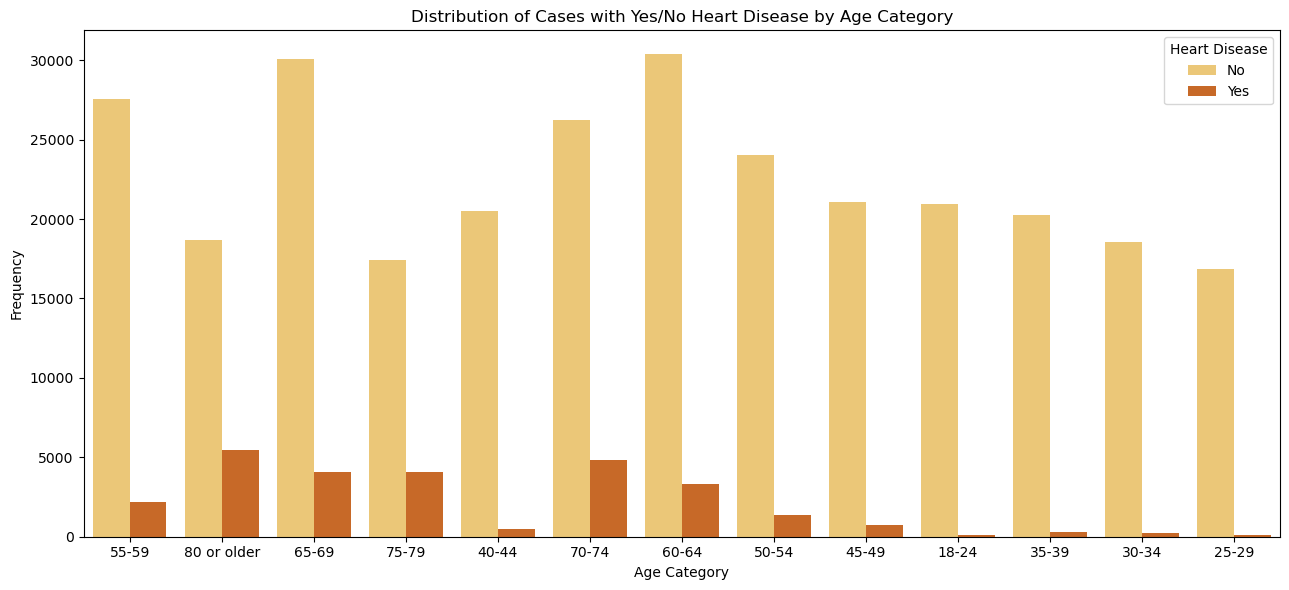

In [13]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x='AgeCategory', hue='HeartDisease_label', data=df, palette='YlOrBr')
plt.title("Distribution of Cases with Yes/No Heart Disease by Age Category")
ax.set_xlabel('Age Category')
ax.set_ylabel('Frequency')
ax.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

- We can see that people who are 80 or older are more likely to get HeartDiseases.

In [14]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend();

In [15]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer")

ax.legend();

In [16]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

ax.legend();

In [17]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic")

ax.legend();

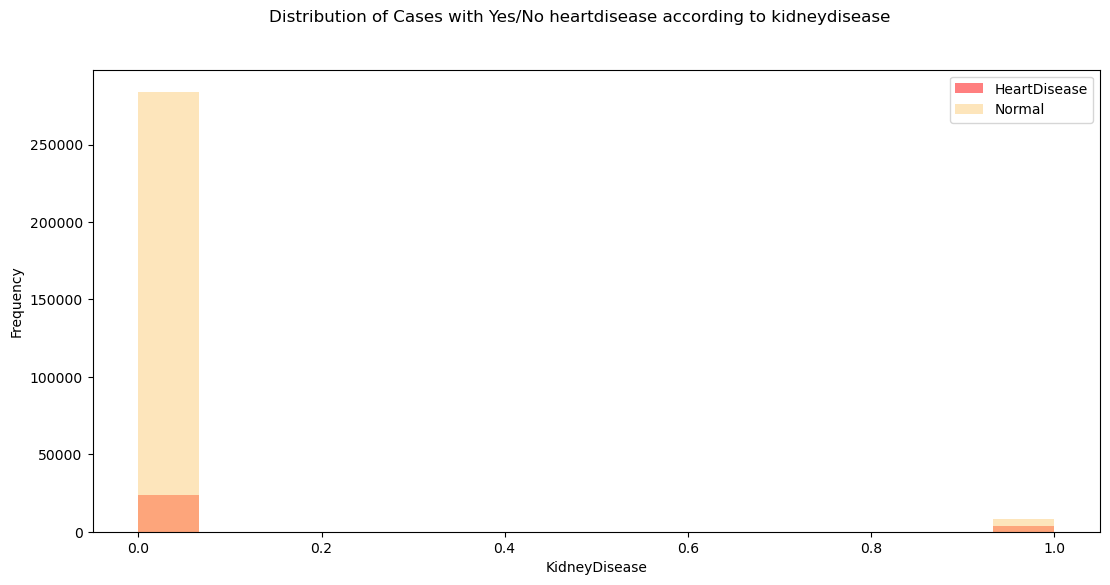

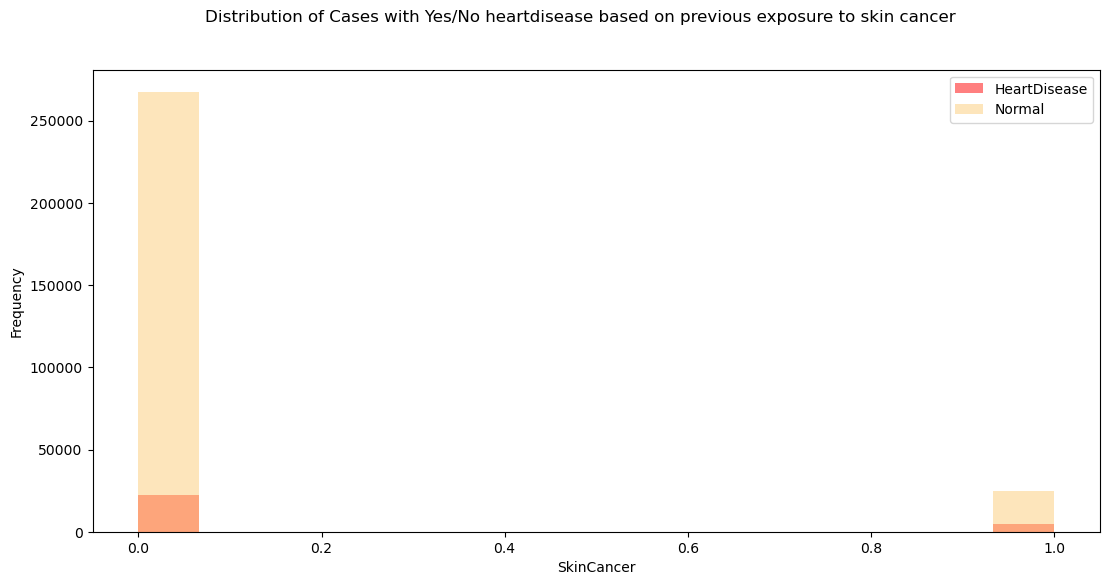

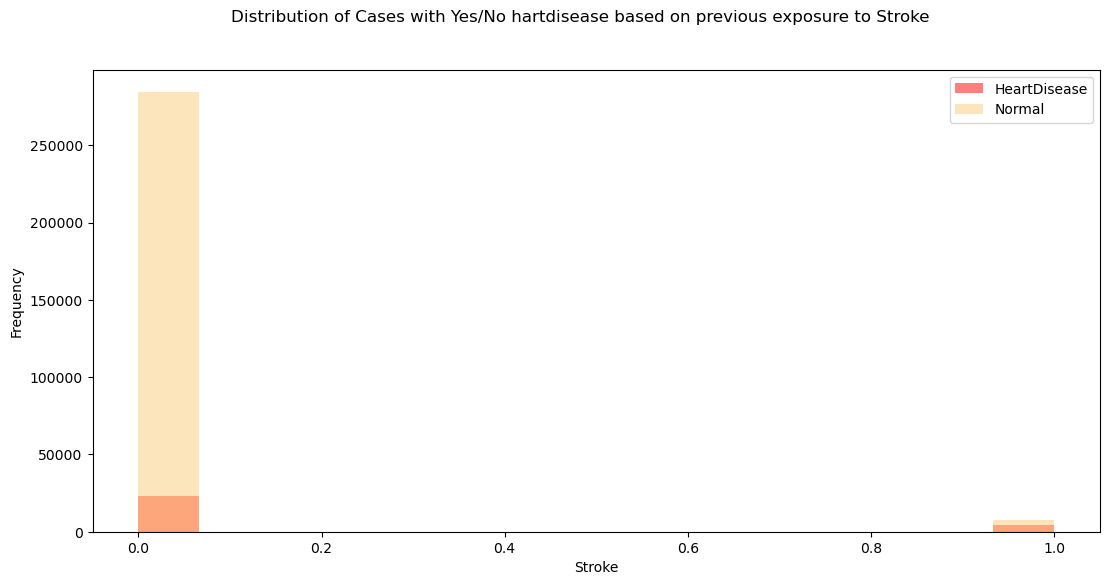

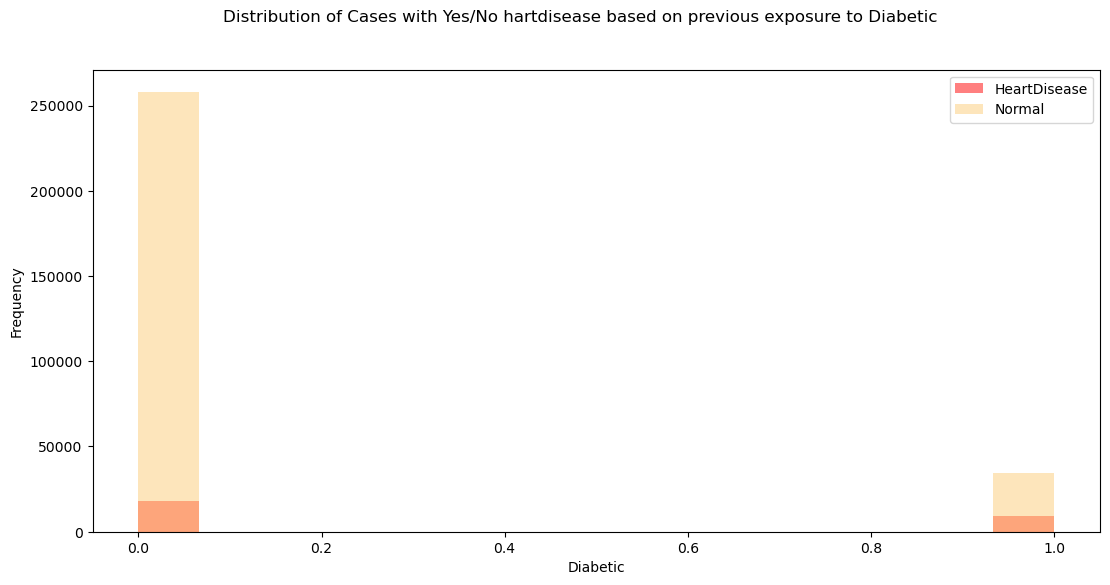

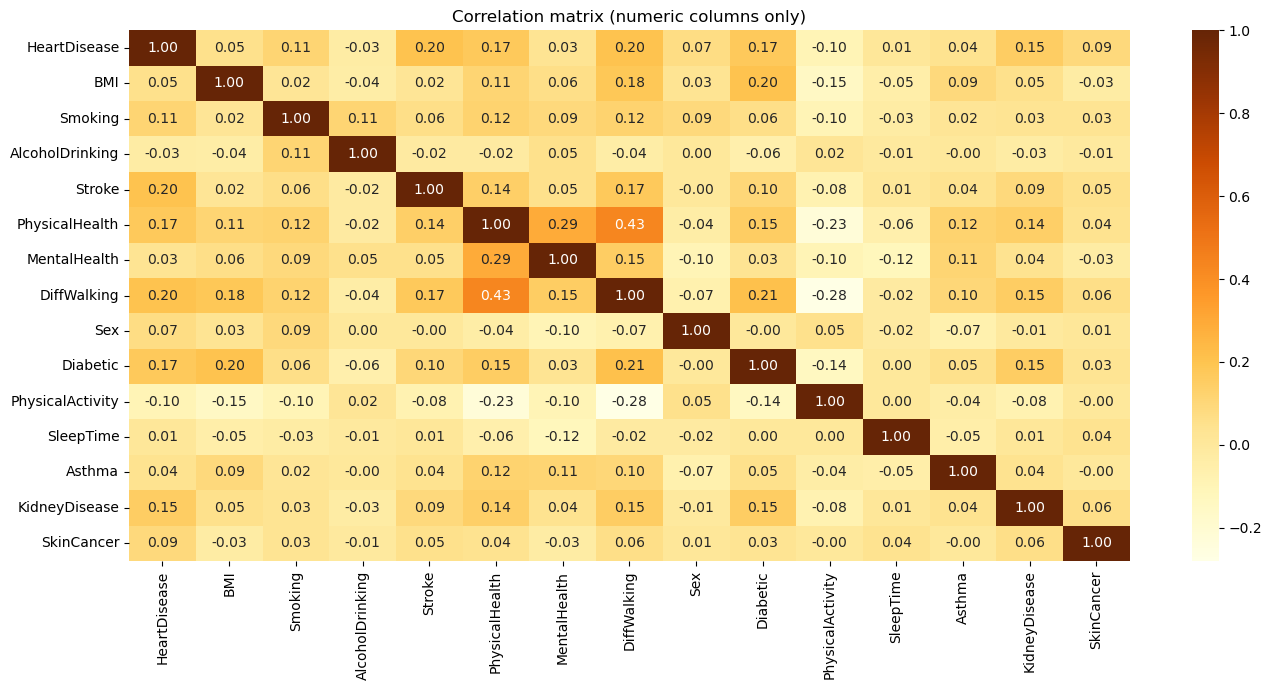

In [18]:
num_df = df.select_dtypes(include=[np.number])   # only numeric columns
corr = num_df.corr().round(2)

plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='YlOrBr', fmt=".2f", square=False)
plt.title("Correlation matrix (numeric columns only)")
plt.tight_layout()
plt.show()

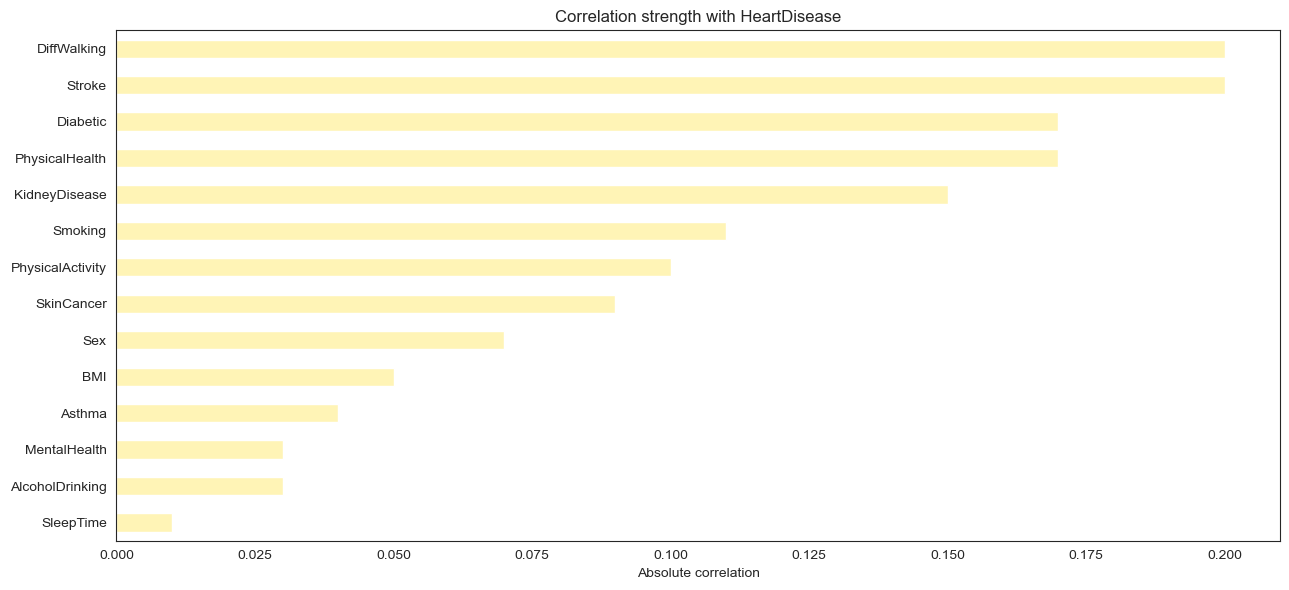

In [19]:
num_df = df.select_dtypes(include=[np.number])
correlation = num_df.corr().round(2)

sns.set_style('white')
sns.set_palette('YlOrBr')

plt.figure(figsize=(13,6))
plt.title('Correlation strength with HeartDisease')
abs(correlation['HeartDisease']).sort_values(ascending=True)[:-1].plot.barh()
plt.xlabel('Absolute correlation')
plt.tight_layout()
plt.show()

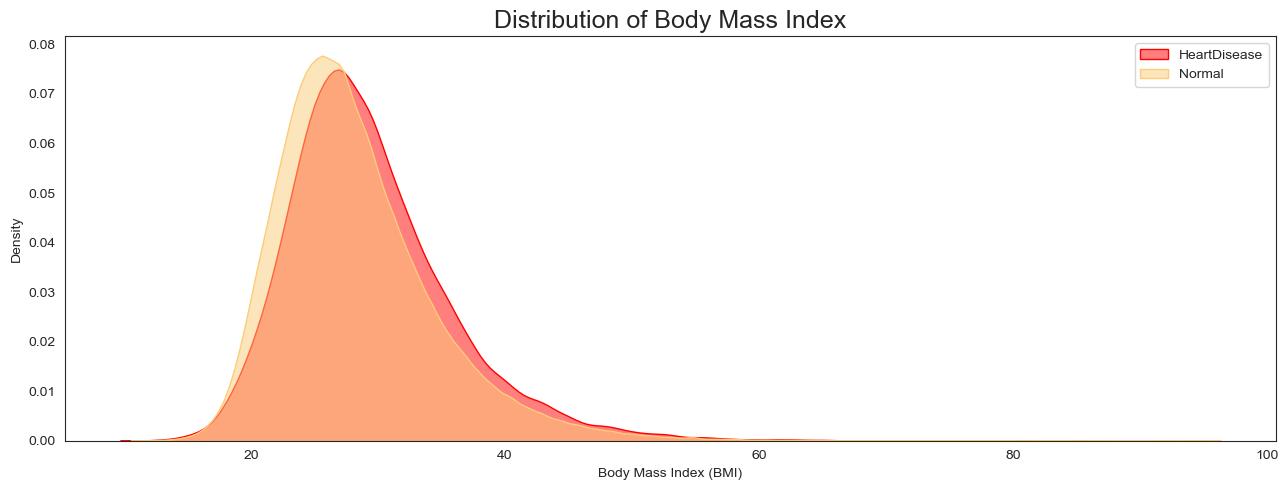

In [20]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['BMI', 'HeartDisease'])

fig, ax = plt.subplots(figsize=(13,5))

sns.kdeplot(
    df[df["HeartDisease"]==1]["BMI"],
    alpha=0.5,
    fill=True,           # replaces shade=True
    color="red",
    label="HeartDisease",
    ax=ax
)

sns.kdeplot(
    df[df["HeartDisease"]==0]["BMI"],
    alpha=0.5,
    fill=True,
    color="#fccc79",
    label="Normal",
    ax=ax
)

ax.set_title('Distribution of Body Mass Index', fontsize=18)
ax.set_xlabel("Body Mass Index (BMI)")
ax.set_ylabel("Density")
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/67/f7tt4bl53c758trm8cl283tc0000gn/T/ipykernel_3339/2242597631.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
/var/folders/67/f7tt4bl53c758trm8cl283tc0000gn/T/ipykernel_3339/2242597631.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


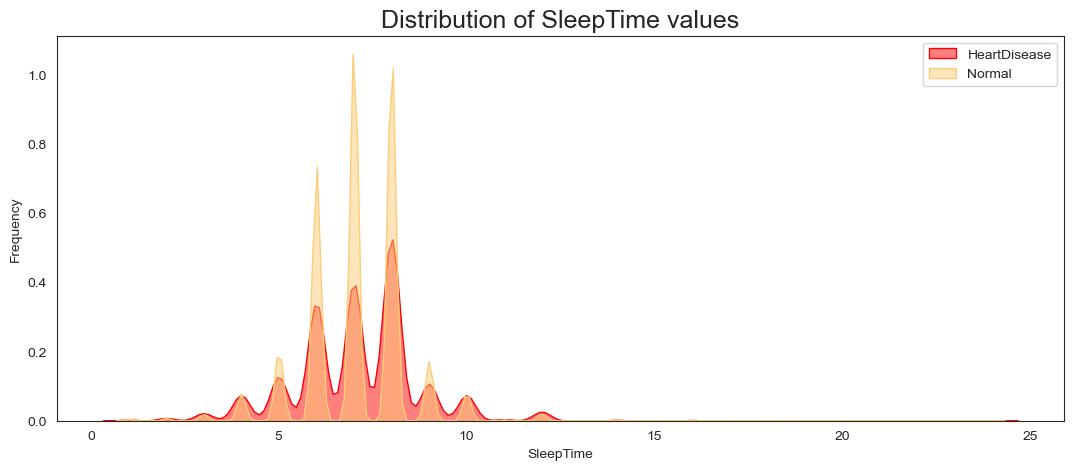

In [21]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

/var/folders/67/f7tt4bl53c758trm8cl283tc0000gn/T/ipykernel_3339/1514741577.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
/var/folders/67/f7tt4bl53c758trm8cl283tc0000gn/T/ipykernel_3339/1514741577.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


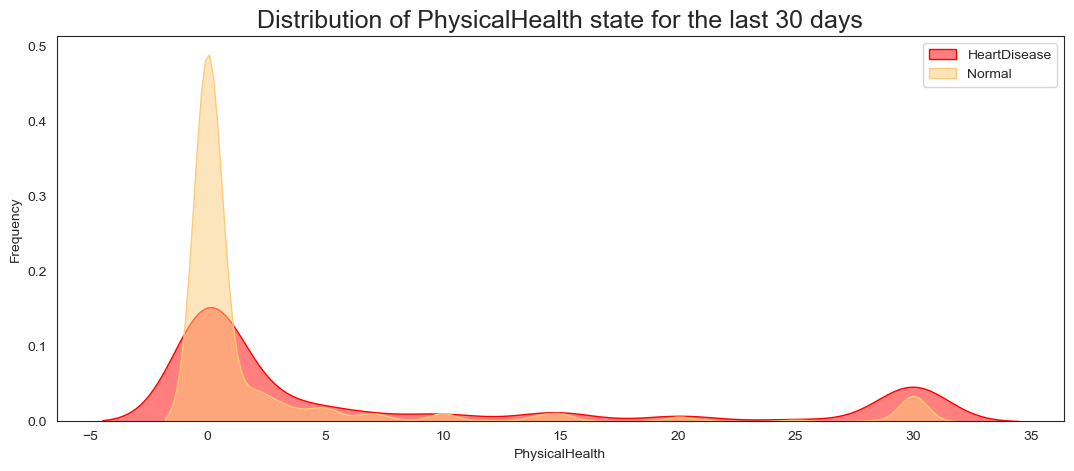

In [22]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

/var/folders/67/f7tt4bl53c758trm8cl283tc0000gn/T/ipykernel_3339/3430554068.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
/var/folders/67/f7tt4bl53c758trm8cl283tc0000gn/T/ipykernel_3339/3430554068.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


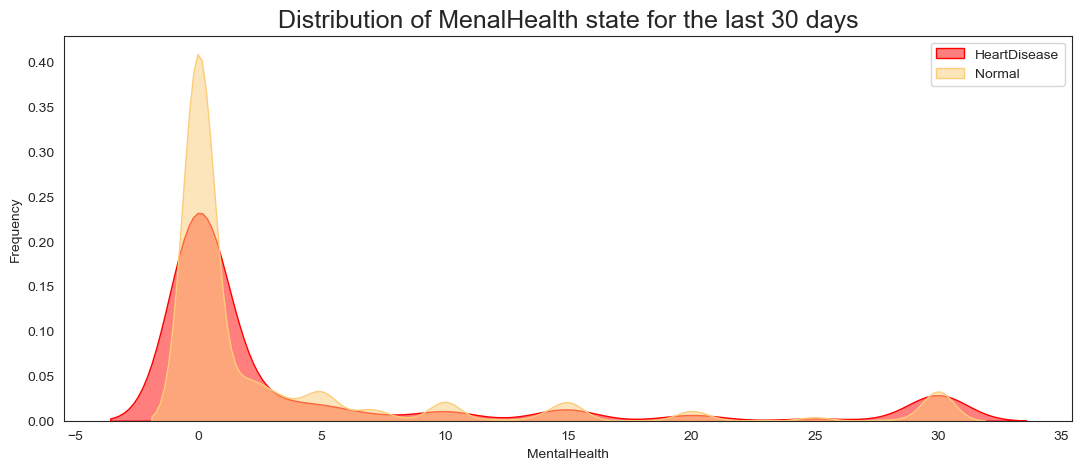

In [23]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of MenalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

In [24]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 18)
Shape of testing feature: (63959, 18)
Shape of training label: (255836,)
Shape of training label: (63959,)


In [25]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough'
)

# Fit on training data only
transformed_train = transformer.fit_transform(X_train)
feature_names = transformer.get_feature_names_out()

# Create dataframe for transformed training data
transformed_train_data = pd.DataFrame(transformed_train, columns=feature_names)

# Replace X_train cleanly (no need to concat + drop)
X_train_encoded = pd.DataFrame(transformed_train, columns=feature_names)

# Now transform test data (no .fit_transform again!)
transformed_test = transformer.transform(X_test)
X_test_encoded = pd.DataFrame(transformed_test, columns=feature_names)

In [26]:
for col in ['HeartDisease', 'HeartDisease_label']:
    if col in X_train.columns:
        X_train = X_train.drop(columns=[col])
    if col in X_test.columns:
        X_test = X_test.drop(columns=[col])

# 2) Recreate and fit the transformer on TRAIN features only
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough'
)

# Fit on training features and transform both train and test
transformed_train = transformer.fit_transform(X_train)
transformed_test  = transformer.transform(X_test)

# Get feature names and create DataFrames
feature_names = transformer.get_feature_names_out()
X_train_encoded = pd.DataFrame(transformed_train, columns=feature_names, index=X_train.index)
X_test_encoded  = pd.DataFrame(transformed_test,  columns=feature_names, index=X_test.index)

# 3) Force all columns to numeric (coerce non-numeric -> NaN)
X_train_encoded = X_train_encoded.apply(lambda s: pd.to_numeric(s, errors='coerce'))
X_test_encoded  = X_test_encoded.apply(lambda s: pd.to_numeric(s, errors='coerce'))

# 4) Sanity checks: any non-numeric/NaN after coercion?
train_non_numeric = X_train_encoded.columns[X_train_encoded.isna().any()].tolist()
test_non_numeric  = X_test_encoded.columns[X_test_encoded.isna().any()].tolist()

if train_non_numeric or test_non_numeric:
    print("Warning: NaNs found after coercion.")
    if train_non_numeric:
        print("Columns with NaNs in X_train_encoded:", train_non_numeric)
    if test_non_numeric:
        print("Columns with NaNs in X_test_encoded:", test_non_numeric)
    # show small sample to help debugging
    print("\nSample rows with NaNs (train):")
    display(X_train_encoded[X_train_encoded.isna().any(axis=1)].head())
    print("\nSample rows with NaNs (test):")
    display(X_test_encoded[X_test_encoded.isna().any(axis=1)].head())
    # Stop here so you can inspect; decide to fill or drop if needed
    # If you'd like automatic filling, uncomment the next two lines to fill NaNs with column means:
    # X_train_encoded = X_train_encoded.fillna(X_train_encoded.mean())
    # X_test_encoded  = X_test_encoded.fillna(X_train_encoded.mean())  # use train means

# If there are no NaNs, proceed. If you chose to fill NaNs, make sure to run the fill lines above first.

# 5) Scale data (fit scaler on training set only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled  = scaler.transform(X_test_encoded)

# Optional: keep column names for later (feature importances)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=feature_names, index=X_test.index)



In [27]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    acc  = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, zero_division=0)
    rec  = metrics.recall_score(y_test, y_pred, zero_division=0)
    f1   = metrics.f1_score(y_test, y_pred, zero_division=0)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    y_pred_proba = None
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(x_test)

    if y_pred_proba is not None:
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
    else:
        fpr, tpr, auc = None, None, None

    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

clf_eval = evaluate_model(clf, X_test_scaled, y_test)

print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.8648040150721557
Precision: 0.23302752293577983
Recall: 0.2565185457216306
F1 Score: 0.24420942225329953
Cohens Kappa Score: 0.17015927735717962
Area Under Curve: 0.5891632921747338
Confusion Matrix:
 [[53915  4598]
 [ 4049  1397]]


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Fit on scaled training data
knn.fit(X_train_scaled, y_train)

# Evaluate on scaled test data
knn_eval = evaluate_model(knn, X_test_scaled, y_test)

# Print results
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9057052174049001
Precision: 0.36104513064133015
Recall: 0.1395519647447668
F1 Score: 0.20129784134551715
Cohens Kappa Score: 0.16149065279680075
Area Under Curve: 0.7175803153536464
Confusion Matrix:
 [[57168  1345]
 [ 4686   760]]


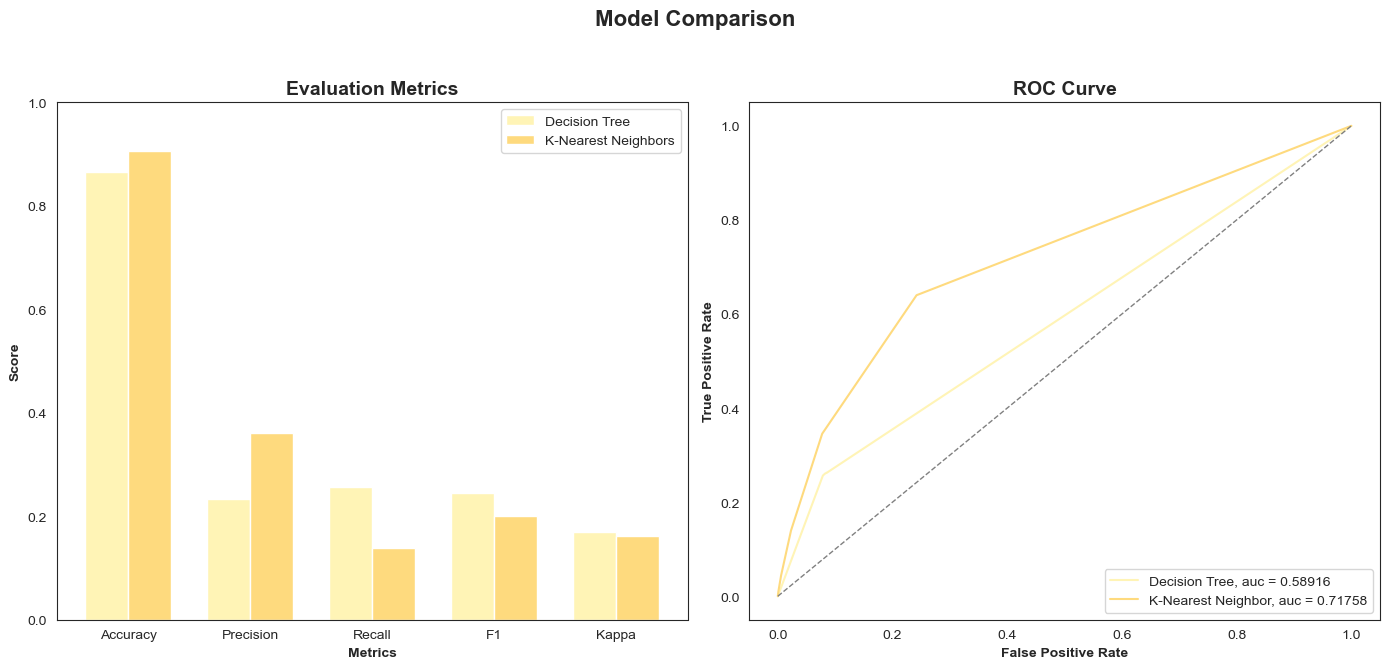

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_facecolor('white')

# First plot: bar chart of metrics
barWidth = 0.35
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']

clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

r1 = np.arange(len(clf_score))
r2 = r1 + barWidth

ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

# X ticks in the center of grouped bars
centers = r1 + barWidth / 2
ax1.set_xticks(centers)
ax1.set_xticklabels(metrics_labels)
ax1.set_xlabel('Metrics', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot: ROC curves (only if fpr/tpr available)
roc_plotted = False

if clf_eval.get('fpr') is not None and clf_eval.get('tpr') is not None:
    ax2.plot(clf_eval['fpr'], clf_eval['tpr'],
             label=f"Decision Tree, auc = {clf_eval['auc']:.5f}" if clf_eval['auc'] is not None else "Decision Tree")
    roc_plotted = True

if knn_eval.get('fpr') is not None and knn_eval.get('tpr') is not None:
    ax2.plot(knn_eval['fpr'], knn_eval['tpr'],
             label=f"K-Nearest Neighbor, auc = {knn_eval['auc']:.5f}" if knn_eval['auc'] is not None else "K-NN")
    roc_plotted = True

ax2.plot([0,1], [0,1], linestyle='--', color='gray', linewidth=1)  # chance line
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')

if roc_plotted:
    ax2.legend(loc='lower right')
else:
    # if no ROC data, add a centered message
    ax2.text(0.5, 0.5, 'ROC data not available\n(no predict_proba / decision_function)', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax2.set_xticks([])
    ax2.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle
plt.show()

In [31]:
import pickle

pickle.dump(knn, open('knn_model.pkl', 'wb'))
pickle.dump(clf, open('dt_model.pkl', 'wb'))
pickle.dump(transformer, open("transformer.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))